# Análise de dados com Pandas e Seaborn

O Pandas é uma biblioteca Python de código aberto para análise de dados. Ela fornece ferramentas de análise de dados e estruturas de dados de alta performance e fáceis de usar. Já o Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos. Sua vantagem sobre o Matplotlib puro é que Seaborn fornece padrões de plotagem estatística que podem ser facilmente ativados com apenas alguns comandos.

A base de dados utilizada aqui é de churn de clientes de uma empresa de telecomunicações. O churn é uma métrica que indica a taxa de evasão de clientes. Neste caso, o churn é definido como a perda de clientes para a concorrência ou por desinteresse em continuar com o serviço. O objetivo é analisar os dados e identificar os principais fatores que levam um cliente a cancelar o serviço.

Temos o seguinte dicionário de dados:

- `id_cliente`: identificador único do cliente
- `genero`: gênero do cliente
- `idoso`: indica se o cliente é idoso (mais de 65 anos) ou não
- `tem_parceiro`: indica se o cliente tem parceiro ou não
- `tem_dependentes`: indica se o cliente tem dependentes ou não
- `meses_na_empresa`: quantidade de meses que o cliente permaneceu na empresa
- `servico_telefone`: indica se o cliente tem serviço de telefone ou não
- `multiplas_linhas`: indica se o cliente tem múltiplas linhas ou não
- `servico_internet`: indica se o cliente tem serviço de internet (DSL ou fibra óptica) ou não
- `servico_seguranca`: indica se o cliente tem serviço de segurança online ou não
- `servico_backup`: indica se o cliente tem serviço de backup online ou não
- `servico_protecao_equipamento`: indica se o cliente tem serviço de proteção do equipamento de conexão ou não
- `servico_suporte_tecnico`: indica se o cliente tem serviço de suporte técnico prioritário ou não
- `streaming_tv`: indica se o cliente tem serviço de streaming de TV ou não
- `streaming_filmes`: indica se o cliente tem serviço de streaming de filmes ou não
- `contrato`: tipo de contrato do cliente (mensal, anual ou dois anos)
- `fatura_digital`: indica se o cliente recebe a fatura por e-mail ou não
- `forma_pagamento`: forma de pagamento do cliente (cheque, boleto, transferência bancária ou cartão de crédito)
- `valor_mensal`: valor mensal do serviço contratado
- `total_gasto`: valor total gasto pelo cliente
- `churn`: indica se o cliente cancelou o serviço no mês anterior ou não



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='dark', palette='bright', context='notebook')

ARQUIVO_DADOS = 'dados/churn_clientes.csv'

df_churn = pd.read_csv(ARQUIVO_DADOS)
df_churn = df_churn.drop(columns='id_cliente', axis=1)


colunas_numericas = df_churn.select_dtypes(include='number').columns
colunas_categoricas = df_churn.select_dtypes(exclude='number').columns
colunas_categoricas = colunas_categoricas.drop('churn')

df_churn.head()

,genero,idoso,tem_parceiro,tem_dependentes,meses_na_empresa,servico_telefone,multiplas_linhas,servico_internet,servico_seguranca,servico_backup,servico_protecao_equipamento,servico_suporte_tecnico,streaming_tv,streaming_filmes,contrato,fatura_digital,forma_pagamento,valor_mensal,total_gasto,churn
0,Feminino,Não,Sim,Não,1,Não,Não,DSL,Não,Sim,Não,Não,Não,Não,Mensal,Sim,Boleto,29.85,29.85,Não
1,Masculino,Não,Não,Não,34,Sim,Não,DSL,Sim,Não,Sim,Não,Não,Não,Anual,Não,Cheque,56.95,1889.50,Não
2,Masculino,Não,Não,Não,2,Sim,Não,DSL,Sim,Sim,Não,Não,Não,Não,Mensal,Sim,Cheque,53.85,108.15,Sim
3,Masculino,Não,Não,Não,45,Não,Não,DSL,Sim,Não,Sim,Sim,Não,Não,Anual,Não,Transferencia,42.30,1840.75,Não
4,Feminino,Não,Não,Não,2,Sim,Não,Fibra optica,Não,Não,Não,Não,Não,Não,Mensal,Sim,Boleto,70.70,151.65,Sim


## Variáveis categóricas


In [16]:
print(colunas_categoricas)
print(len(colunas_categoricas))

Index(['genero', 'idoso', 'tem_parceiro', 'tem_dependentes',
       'servico_telefone', 'multiplas_linhas', 'servico_internet',
       'servico_seguranca', 'servico_backup', 'servico_protecao_equipamento',
       'servico_suporte_tecnico', 'streaming_tv', 'streaming_filmes',
       'contrato', 'fatura_digital', 'forma_pagamento'],
      dtype='object')
16


### Análise dos percentuais de churn por categoria

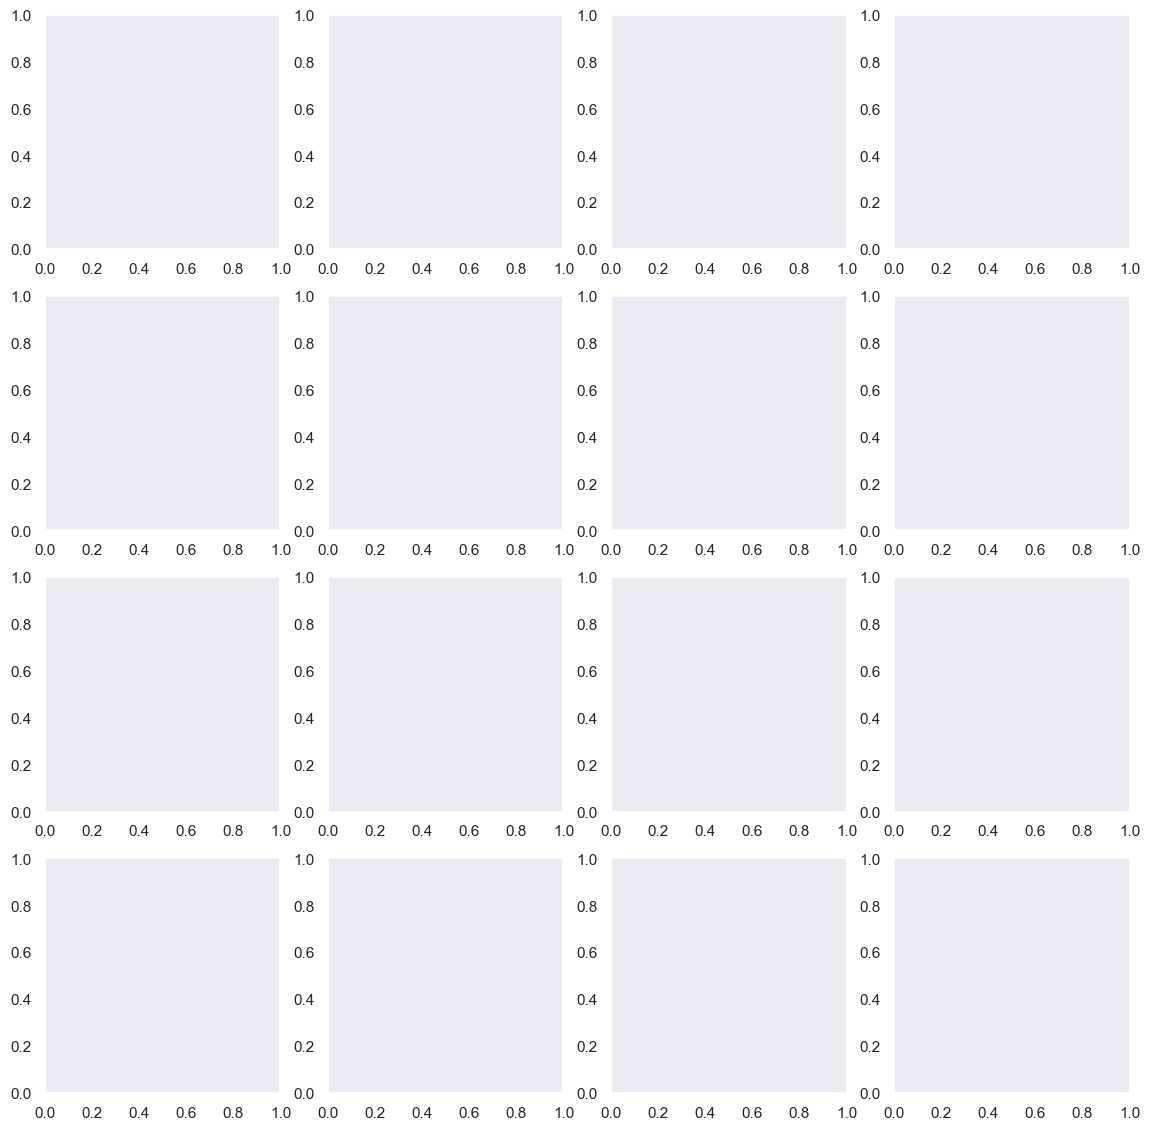

In [17]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14, 14))

plt.show()

In [18]:
# array do np
print(axs)

[[<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]]


In [19]:
print(type(axs))

<class 'numpy.ndarray'>


In [20]:
# atributo flat -> cria um objeto em memória, aonde iremos, por exemplo, passar nossa
# matriz bidimensional, para uma unidimensional, como se estivessemos 'achatando' a matriz

print(list(axs.flat))

[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]


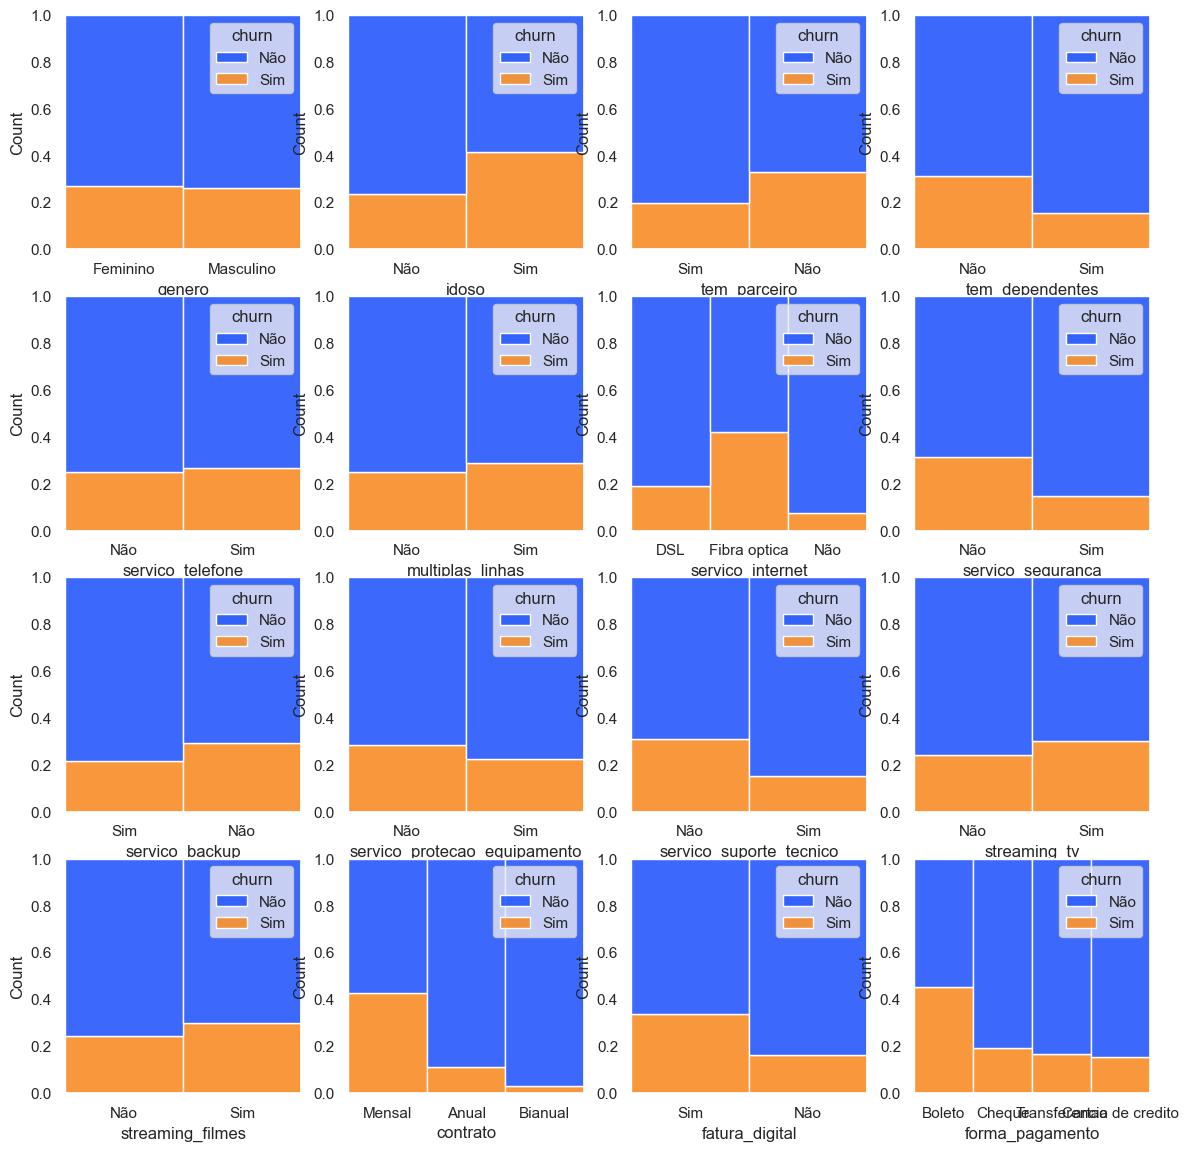

In [21]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14, 14))

for i, coluna in enumerate(colunas_categoricas):
    # a propriedade fill preenche o histograma como se fosse uma barra que varia de 0 a 1
    # para termos a porcentagem esperada, basta multiplicar por 100
    sns.histplot(x=coluna, data=df_churn, hue='churn', multiple='fill',ax=axs.flat[i])

plt.show()

# Propriedades Plot
- A propriedade fill preenche o histograma como se fosse uma barra que varia de 0 a 1
- Para termos a porcentagem esperada, basta multiplicar por 100
- Quando geramos esse tipo de gráfico, geralmente vemos escrito Count no eixo y, mas como queremos 'ver' como porcentagem,
basta adicionar um stat='percent', que isso vai corrigir essa situação
- Para compartilhar o mesmo eixo y, basta passar a informação sharey=True, para o subplots, que isso também corrige essa questão
- Para dar uma 'emagrecida' nas barras, podemos utilizar o paraâmetro no histplot chamado shrink, que significa encolher. Ao colocarmos um valor menor que 1, ele já vai dar essa diminuida na largura da barra, facilitando assim a leitura do gráfico.
- Para que os textos que estão localizados abaixo de cada barra não fiquem sobrepostos, devemos aplicar algumas alterações no objeto relacionado aos histogramas.
    - denominamos uma variavel para criação do nosso histograma e aplicamos a seguinte alteração de parâmetros:
        - h.tick_params(axis='x', labelrotation=45)
            - Aqui estamos alterando os parâmetros do eixo x, dando uma leve rotação de 45˚ na label
- Para corrigir a sobreposição que ocorreu da legenda, podemos aplicar o tight_layout=True, aonde é efetuado um ajuste dos subplots, aonde os histogramas acabam ficando espaçados no espaço dedicado.
- Para alinhar as labels dos gráficos, a nível de figura, basta apicar o seguinte comando:
    - fig.align_labels()
    - Aplicamos a nível de figura, pois, um sistema de eixo, não tem a ciência da existência do outro sistema e a figura em si tem esse conhecimento.
    

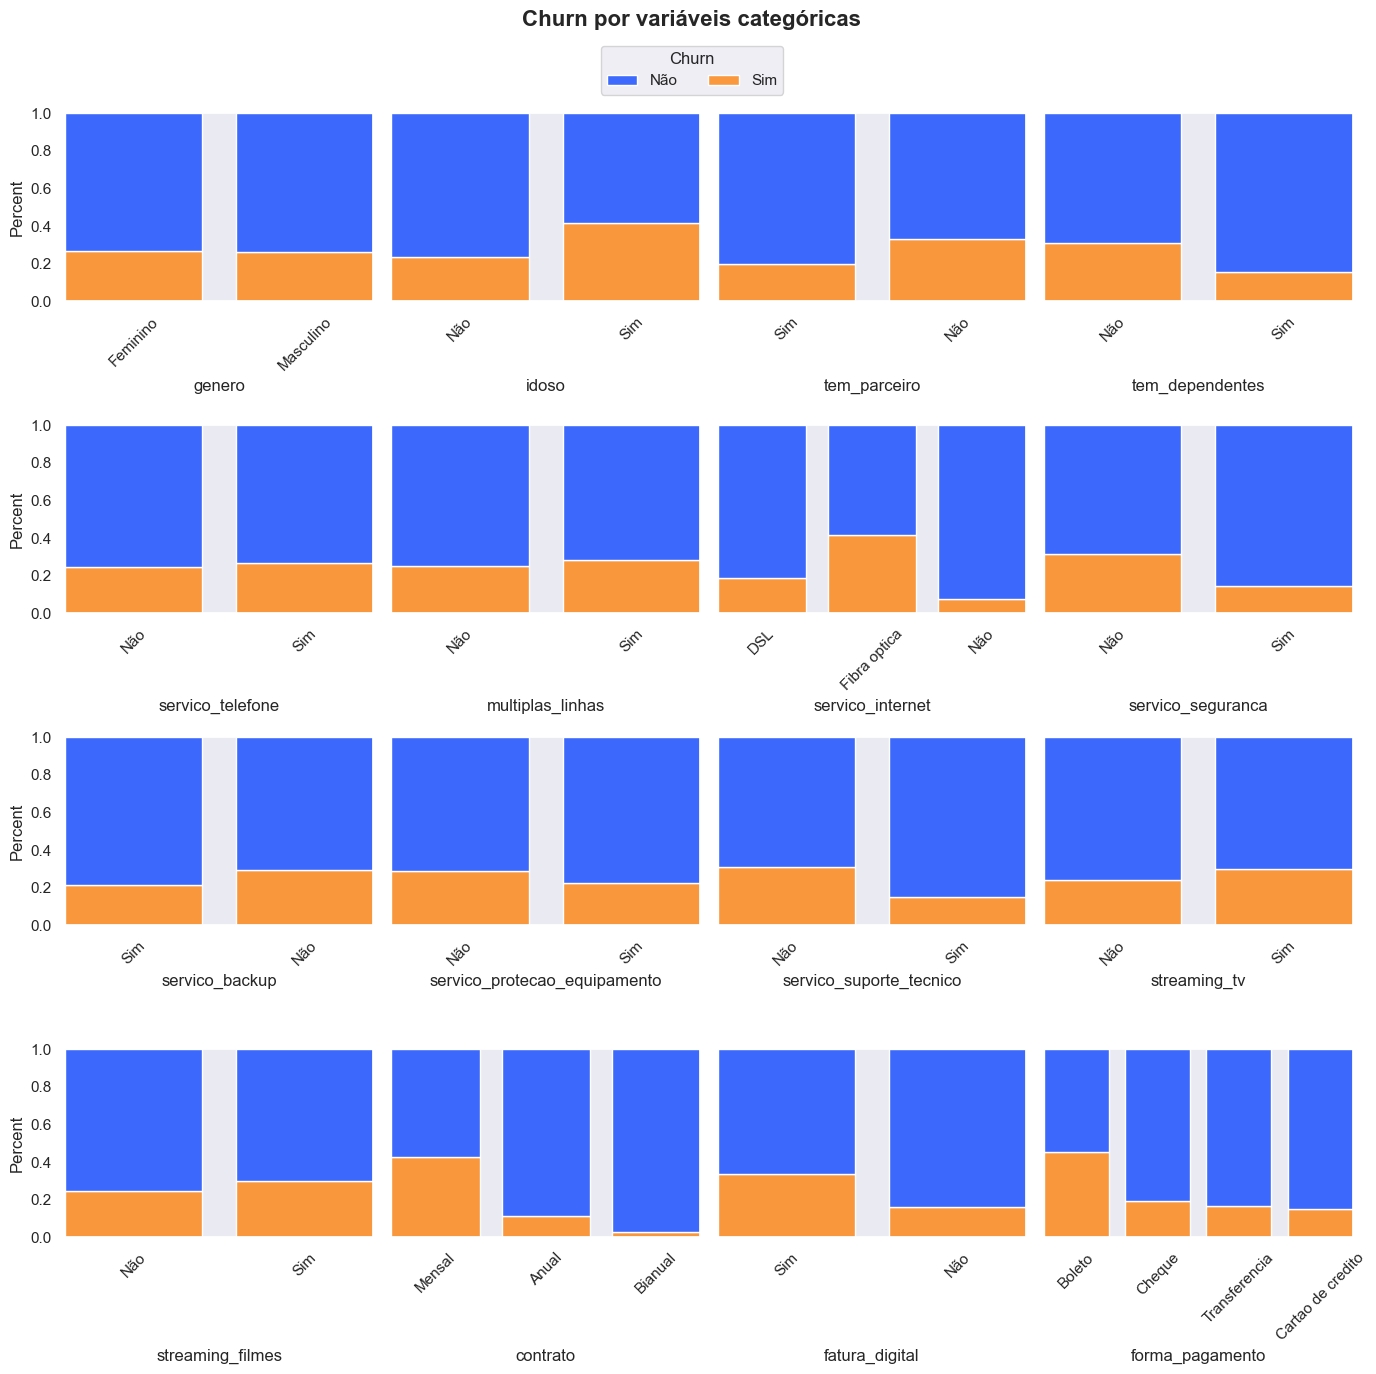

In [36]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14, 14), sharey=True, tight_layout=True)

for i, coluna in enumerate(colunas_categoricas):
    h = sns.histplot(x=coluna, data=df_churn, hue='churn', multiple='fill',ax=axs.flat[i], stat='percent', shrink=0.8)
    h.tick_params(axis='x', labelrotation=45)
    legenda = h.get_legend()
    legenda.remove()

rotulos = [text.get_text() for text in legenda.get_texts()]

fig.legend(handles=legenda.legend_handles, labels=rotulos, loc='upper center', ncols=2, title='Churn', bbox_to_anchor=(0.5, 0.96))
fig.suptitle('Churn por variáveis categóricas\n\n\n', fontsize=16, fontweight='bold')
fig.align_labels()

plt.show()